#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

# BIVARIATE

## Gender x Country

In [6]:
df_gender_country = df[['M/F', 'Country']]
df_male_country = df_gender_country[df_gender_country['M/F'] == 'M']
df_female_country = df_gender_country[df_gender_country['M/F'] == 'F']

In [7]:
# males
male_country_count = df_male_country['Country'].value_counts()
male_country_percent = round(df_male_country['Country'].value_counts(normalize=True) * 100, 2)
# results df
df_male_country_dist = pd.concat([male_country_count, male_country_percent], axis=1)

# females
female_country_count = df_female_country['Country'].value_counts()
female_country_percent = round(df_female_country['Country'].value_counts(normalize=True) * 100, 2)
# results df
df_female_country_dist = pd.concat([female_country_count, female_country_percent], axis=1)

print(f"males country distribution:\n{df_male_country_dist.head(10)}\n")
print(f"females country distribution:\n{df_female_country_dist.head(10)}")

males country distribution:
         count  proportion
Country                   
USA      33390       76.79
CAN       3499        8.05
GBR        707        1.63
MEX        510        1.17
GER        437        1.01
ITA        378        0.87
JPN        357        0.82
CHN        307        0.71
BRA        305        0.70
AUS        294        0.68

females country distribution:
         count  proportion
Country                   
USA      31084       85.97
CAN       2672        7.39
GBR        365        1.01
MEX        258        0.71
AUS        181        0.50
GER        136        0.38
JPN        134        0.37
BRA        123        0.34
CHN        123        0.34
ITA         96        0.27


### visualization

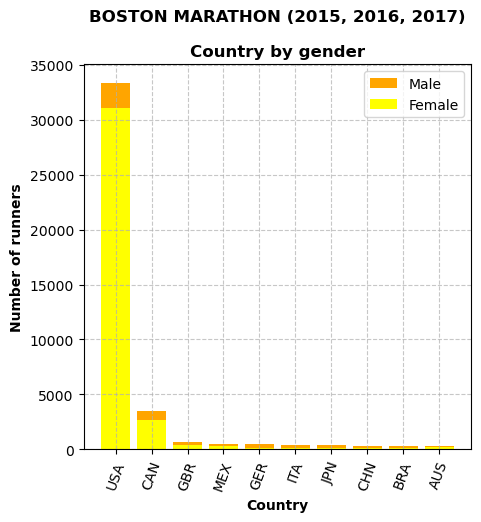

In [9]:
x_m = df_male_country_dist.head(10)
x_fm = df_female_country_dist.head(10)

plt.figure(figsize=(5,5))
width = 0.4

plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
plt.bar(x_fm.index, x_fm['count'], alpha=1, color='yellow', label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=70)

plt.xlabel('Country', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nCountry by gender', fontweight='bold')

plt.savefig("../vexport/genderxcountry.png", dpi=300, bbox_inches='tight')
plt.show()

### visualization without USA and Canada

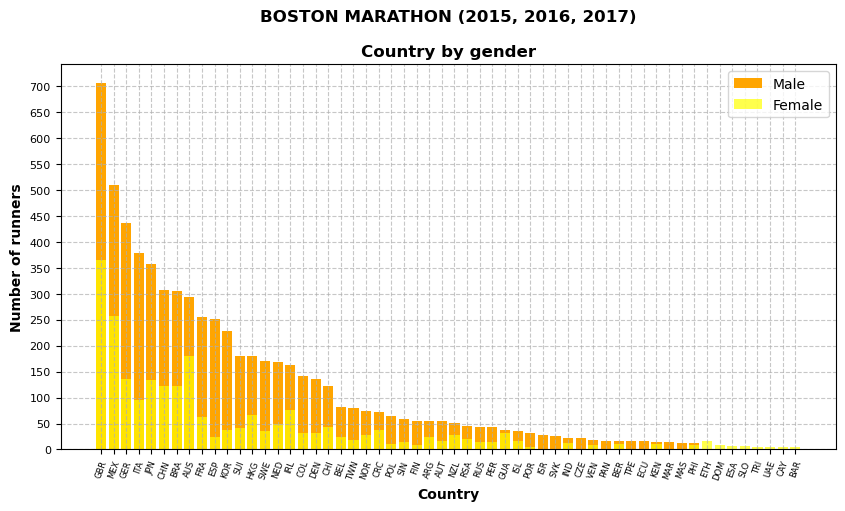

In [11]:
x_m = df_male_country_dist.head(50)
x_fm = df_female_country_dist.head(50)
x_m = x_m.drop(['USA', 'CAN'])
x_fm = x_fm.drop(['USA', 'CAN'])

plt.figure(figsize=(10,5))

ax_m = plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
ax_fm = plt.bar(x_fm.index, x_fm['count'], alpha=0.7, color='yellow', label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=70, fontsize= 6)
plt.yticks(np.arange(0,701,50), fontsize=8)


plt.xlabel('Country', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nCountry by gender', fontweight='bold')

plt.savefig("../vexport/genderxcountry_noUSA_noCAN.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [13]:
df_male_country_dist.to_csv('../export/mfxcountry_male_dist.csv')
df_female_country_dist.to_csv('../export/mfxcountry_female_dist.csv')